# Importing Libraries

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style()
plt.style.use('fivethirtyeight')

# Import Data

In [2]:
data=pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Spending_score'},inplace=True)
data.head()

,CustomerID,Gender,Age,Income,Spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data Visualisation

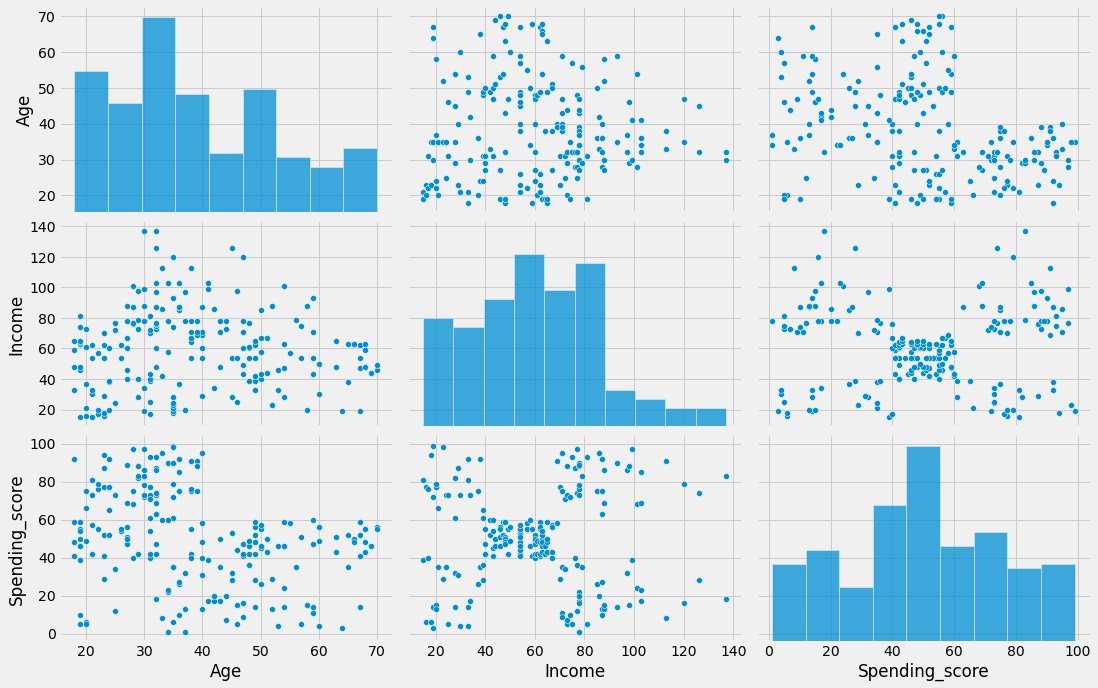

In [34]:
sns.pairplot(data[['Age','Income','Spending_score']])

fig=plt.gcf()
fig.set_size_inches(17,10)

##### Gender

In [6]:
data['Gender'].size

200

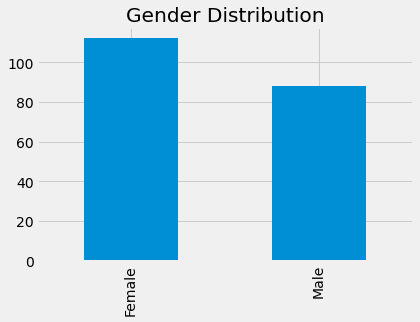

In [7]:
data['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.show()

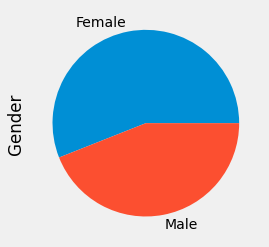

In [8]:
data['Gender'].value_counts().plot(kind='pie')
plt.show()

##### Age

In [9]:
data['Age'].size

200

c:\users\hercules\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


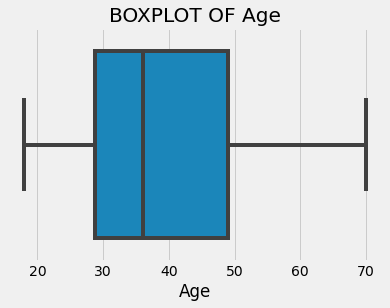

In [10]:
plt.title("BOXPLOT OF Age")
sns.boxplot(data['Age'])
plt.show()

##### Annual Income

In [11]:
data['Income'].size

200

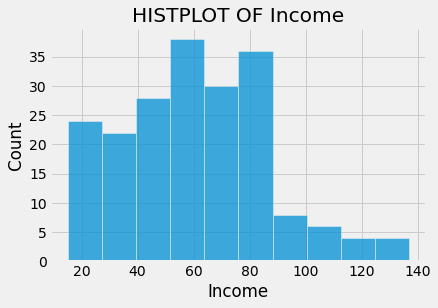

In [12]:
plt.title("HISTPLOT OF Income")
sns.histplot(data['Income'])
plt.show()

##### Spending Score

In [13]:
data['Spending_score'].size

200

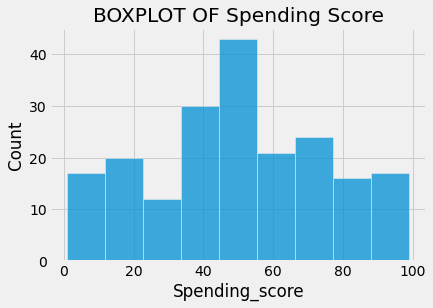

In [14]:
plt.title("BOXPLOT OF Spending Score")
sns.histplot(data['Spending_score'])
plt.show()

# Customer Segmentation 

## Clustering On Bases Of Age and there Spending Score

In [15]:
X=data.iloc[:,[2,4]].values

Text(0, 0.5, 'Spending Score')

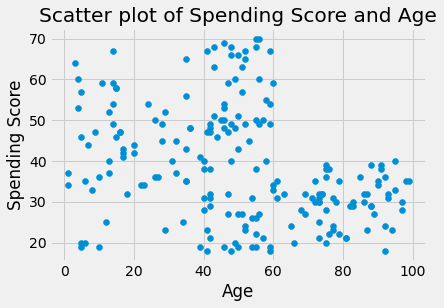

In [16]:
plt.scatter(data['Spending_score'],data['Age'])
plt.title('Scatter plot of Spending Score and Age')
plt.xlabel('Age')
plt.ylabel('Spending Score')

In [17]:
List = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    List.append(km.inertia_)

### Elbow Plot

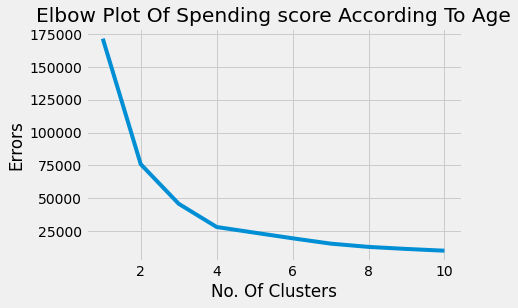

In [18]:
plt.plot(range(1,11),List)
plt.title('Elbow Plot Of Spending score According To Age')
plt.xlabel('No. Of Clusters')
plt.ylabel('Errors')
plt.show()

In [19]:
km=KMeans(n_clusters=4,init='k-means++',random_state=0)
Y_kmeans=km.fit_predict(X)
Y_kmeans

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 3, 2,
       0, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 3, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [20]:
clusters= km.cluster_centers_
clusters

array([[43.29166667, 15.02083333],
       [30.1754386 , 82.35087719],
       [27.61702128, 49.14893617],
       [55.70833333, 48.22916667]])

In [21]:
X[Y_kmeans==0,1]

array([ 6,  6,  3, 14, 15, 13, 29,  5, 14, 32, 31,  4,  4, 14, 17, 26, 28,
       11,  9,  5,  7, 10,  5, 12, 22, 17, 20, 16,  1,  1,  5, 26, 20, 27,
       13, 10, 13, 15, 14, 32, 15, 24, 17, 23,  8, 16, 28, 18],
      dtype=int64)

### Clusters And Their Centriods

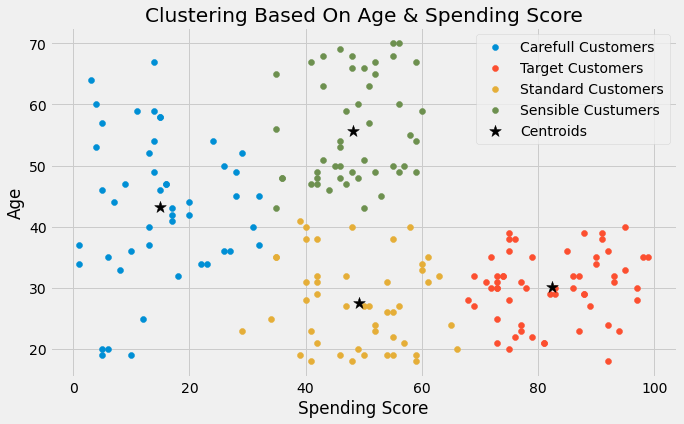

In [22]:
plt.figure(figsize=(10,6))

plt.scatter(X[Y_kmeans==0,1],X[Y_kmeans==0,0],label='Carefull Customers')
plt.scatter(X[Y_kmeans==1,1],X[Y_kmeans==1,0],label='Target Customers')
plt.scatter(X[Y_kmeans==2,1],X[Y_kmeans==2,0],label='Standard Customers')
plt.scatter(X[Y_kmeans==3,1],X[Y_kmeans==3,0],label='Sensible Custumers')


plt.scatter(clusters[0][1], clusters[0][0], marker='*', s=150, color='black',label='Centroids')
plt.scatter(clusters[1][1], clusters[1][0], marker='*', s=150, color='black')
plt.scatter(clusters[2][1], clusters[2][0], marker='*', s=150, color='black')
plt.scatter(clusters[3][1], clusters[3][0], marker='*', s=150, color='black')

plt.title('Clustering Based On Age & Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Age')
plt.legend()
plt.show()

In [23]:
data['Type-1'] = Y_kmeans
data

,CustomerID,Gender,Age,Income,Spending_score,Type-1
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0


### INSIGHTS:

-All the customers in Cluster-0 (Carefull Customers): They are those who spend less even though their age is less or high.

-All the customers in Cluster-1 (Target Customers): They are actually the targeted customers who have high expenditures and but age is low.

-All the customers in Cluster-2 (Standard Customers): They are those who's age is low and annual expenditure is average. 

-All the customers in Cluster-3 (Sensible Customers): They are those who's age is high and annual expenditure is average.


## Clustering On Basis Of Annual Income and there Spending Score

In [24]:
X1=data.iloc[:,[3,4]].values

In [25]:
X1

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

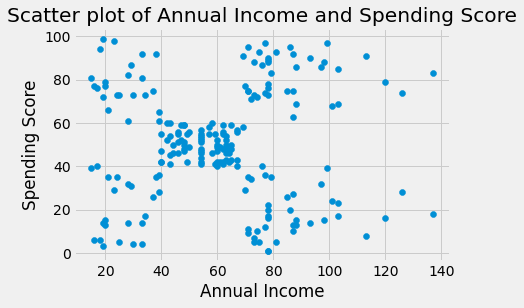

In [26]:
plt.scatter(data['Income'],data['Spending_score'])
plt.title('Scatter plot of Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### Elbow plot

In [27]:
Li = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(X1)
    Li.append(km.inertia_)

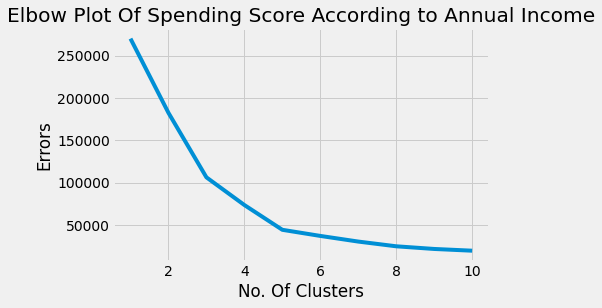

In [28]:
plt.plot(range(1,11),Li)
plt.title('Elbow Plot Of Spending Score According to Annual Income')
plt.xlabel('No. Of Clusters')
plt.ylabel('Errors')
plt.show()

In [29]:
km1=KMeans(n_clusters=5,init='k-means++',random_state=0)
Y_kmeans1=km1.fit_predict(X1)
Y_kmeans1

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [30]:
clusters1= km1.cluster_centers_
clusters1

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [31]:
X1[Y_kmeans1==0,1]

array([29, 11,  9,  5,  7, 10,  5, 12, 36, 22, 17, 20, 16,  1,  1, 35,  5,
       26, 20, 27, 13, 10, 13, 15, 14, 32, 15, 39, 24, 17, 23,  8, 16, 28,
       18], dtype=int64)

### Clusters And Their Centroids

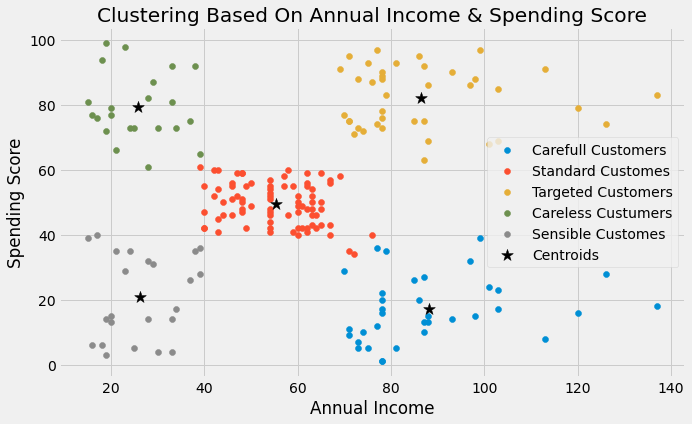

In [32]:
plt.figure(figsize=(10,6))

plt.scatter(X1[Y_kmeans1==0,0],X1[Y_kmeans1==0,1],label='Carefull Customers')
plt.scatter(X1[Y_kmeans1==1,0],X1[Y_kmeans1==1,1],label='Standard Customes')
plt.scatter(X1[Y_kmeans1==2,0],X1[Y_kmeans1==2,1],label='Targeted Customers')
plt.scatter(X1[Y_kmeans1==3,0],X1[Y_kmeans1==3,1],label='Careless Custumers')
plt.scatter(X1[Y_kmeans1==4,0],X1[Y_kmeans1==4,1],label='Sensible Customes')

plt.scatter(clusters1[0][0], clusters1[0][1], marker='*', s=150, color='black',label='Centroids')
plt.scatter(clusters1[1][0], clusters1[1][1], marker='*', s=150, color='black')
plt.scatter(clusters1[2][0], clusters1[2][1], marker='*', s=150, color='black')
plt.scatter(clusters1[3][0], clusters1[3][1], marker='*', s=150, color='black')
plt.scatter(clusters1[4][0], clusters1[4][1], marker='*', s=150, color='black')

plt.title('Clustering Based On Annual Income & Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [33]:
data['Type-2'] = Y_kmeans1
data

,CustomerID,Gender,Age,Income,Spending_score,Type-1,Type-2
0,1,Male,19,15,39,2,4
1,2,Male,21,15,81,1,3
2,3,Female,20,16,6,0,4
3,4,Female,23,16,77,1,3
4,5,Female,31,17,40,2,4
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,2
196,197,Female,45,126,28,0,0
197,198,Male,32,126,74,1,2
198,199,Male,32,137,18,0,0


### INSIGHTS:

-All the customers in Cluster-0 (Carefull Customers): They are those who spend less even though their annual income is more. They are very carefull about their total expenditure.

-All the customers in Cluster-1 (Standard Customers): They are average in both income as well as total expenditure.

-All the customers in Cluster-2 (Targeted Customers): They are actually the targeted customers who have high annual income and their annual expenditure is also high.

-All the customers in Cluster-3 (Careless Customers): They have low annual income still they spend more in the mall.

-All the customers in Cluster-4 (Sensible Customers): They have low income and they also spend less in the mall as expected.
